# Logistic Regression

`logistic regression` is a `classification` algorithm used to assign observation to a discrete set of classes.
Unlike linear regression which outputs continous number values, logistic regression transforms its output using the `logistic sigmoid function` to return a `probability value` which can then ve mapped to two or more discrete classes. 

Logistic regression can be used for:
1. Binary Classification
2. Multi_ class Classification
3. One-vs-Rest Classification

## Assumptions of Logistic Regressino
1. The dependent variable must be categorical in nature.
2. The independent variable(feature) must be independent.
3. There should be no outliers in the data. check for outliers.
4. There should be no high correlations among the independent  variables. This can be checked using a correlation matrix.

In [32]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [33]:
#data import 
df = sns.load_dataset("titanic") 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
#pre process the data
#remove the duck column
df.drop('deck', axis=1, inplace=True)
#impute missing values in age and fare
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

#impute missing values in embark and emarked town
df['embark_town'].fillna(df['embark_town'].mode(), inplace=True)
df['embarked'].fillna(df['embarked'].mode(), inplace=True)

# encode The categorical variables using for loop where object and category data given

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = le.fit_transform(df[col])

print("encode success")



encode success


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int32  
 12  alive        891 non-null    int32  
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int32(6), int64(4)
memory usage: 64.5 KB


In [37]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [38]:
# x and y colums
x = df.drop('survived', axis=1) # servived ky elawa sare columns ko x mai ley, 
y = df['survived']

In [39]:
# train test split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [40]:
# model call
model = LogisticRegression()


In [41]:
# train the model
model.fit(x_train, y_train)

c:\Users\Muhammad Zeeshan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# predict the vale
y_pred = model.predict(x_test)

In [44]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('precision score: ', precision_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("confusion Matrix: \n ", confusion_matrix(y_test, y_pred) )
print("Classification Report: \n ", classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score:  1.0
precision score:  1.0
F1 score:  1.0
confusion Matrix: 
  [[110   0]
 [  0  69]]
Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'actual')

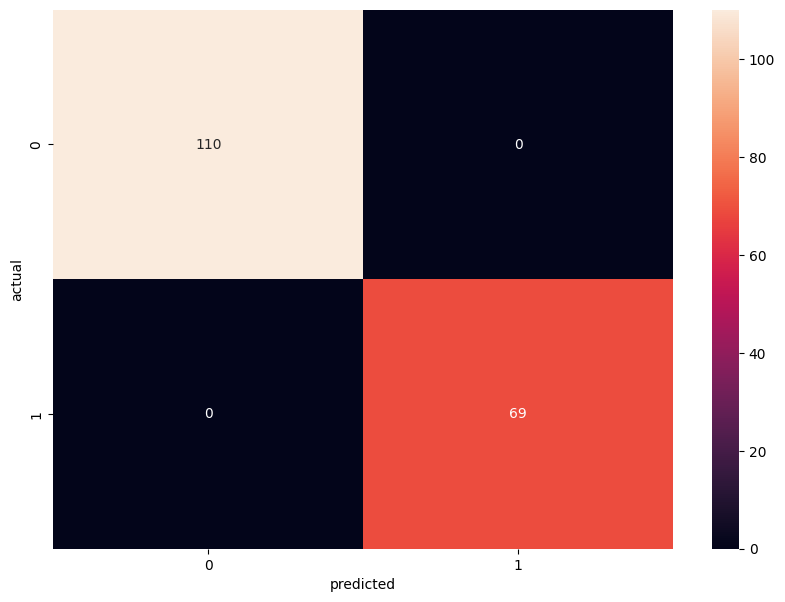

In [54]:
# plot the confusion metrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=
            'd')
plt.xlabel('predicted')
plt.ylabel('actual')

In [53]:
# save the model
import pickle
pickle.dump(model, open('./saved_model/01_model_logistic_regression.pkl', 'wb'))